In [1]:
import sympy as sp
import jax.numpy as np
import matplotlib.pyplot as plt

In [2]:
from eq4 import config
from main import run

In [3]:
network, best = run(config)

16:44:34.340 [INFO] Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
16:44:34.340 [INFO] Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
16:44:34.341 [INFO] Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
16:44:34.726 [INFO] Constructed symbolic model
16:45:07.564 [INFO] Constructed JAXified model
16:45:10.912 [INFO] Epoch: 1, Loss: 35.92521667480469
16:45:10.989 [INFO] Epoch: 10, Loss: 3.8469345569610596
16:45:11.680 [INFO] Epoch: 20, Loss: 3.260688304901123
16:45:11.148 [INFO] Epoch: 30, Loss: 2.8149282932281494
16:45:11.229 [INFO] Epoch: 40, Loss: 2.442568063735962
16:45:11.306 [INFO] Epoch: 50, Loss: 2.127377986907959
16:45:11.402 [INFO] Epoch: 60, Loss: 1.8590092658996582
16:45:11.489 [INFO] Epoch: 70, Loss: 1.6292589902877808
16:45:11.576 [INFO] Epoch: 80, Loss: 1.43168044090271
16:45:11.658 [

Nothing more to prune!


$\displaystyle 0.392028778791428 \cos{\left(0.221272468566895 k x \right)} + 0.60792601108551$

In [4]:
best.loss

DeviceArray(0.00056627, dtype=float32)

In [5]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.392028778791428*cos(0.221272468566895*k*x) + 0.60792601108551

In [14]:
from jax import vmap
x = network.symbols.x
k = network.symbols.k
y_pred_fn = sp.lambdify([x, k], y_prediction_best)
# y_real_fn = sp.lambdify(..?)

In [16]:
y_pred_fn(np.array([0.5, 0.6]), 0.1)

array([0.9999308 , 0.99992025], dtype=float32)

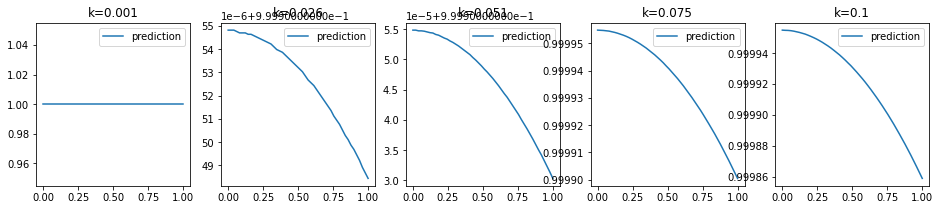

In [21]:
x_try = np.linspace(0, 1, 50)

k_tries = np.linspace(0.001, 0.1, 5, True)
fig, axs = plt.subplots(1, len(k_tries))
fig.set_size_inches(len(k_tries)*3.2, 3)

for ax, k_try in zip(axs, k_tries):
  ax.set_title(f'k={round(float(k_try), 3)}')
  ax.plot(x_try, y_pred_fn(x_try, k_try), label=f'prediction')
  # ax.plot(x_try, y_real_fn(x_try, k_try), label=f'actual')
  ax.legend()
plt.show()